<a href="https://colab.research.google.com/github/Bharasaurus/Pneumonia-Detection/blob/main/Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
Image_Size=256
Batch_Size=32
train_dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Deep Learning/chest_xray/train",shuffle=True,
                                                            image_size=(Image_Size,Image_Size),
                                                            batch_size=Batch_Size)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Deep Learning/chest_xray/test",shuffle=True,
                                                            image_size=(Image_Size,Image_Size),
                                                            batch_size=Batch_Size)
val_dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Deep Learning/chest_xray/val",shuffle=True,
                                                            image_size=(Image_Size,Image_Size),
                                                            batch_size=Batch_Size)
class_names=train_dataset.class_names
train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


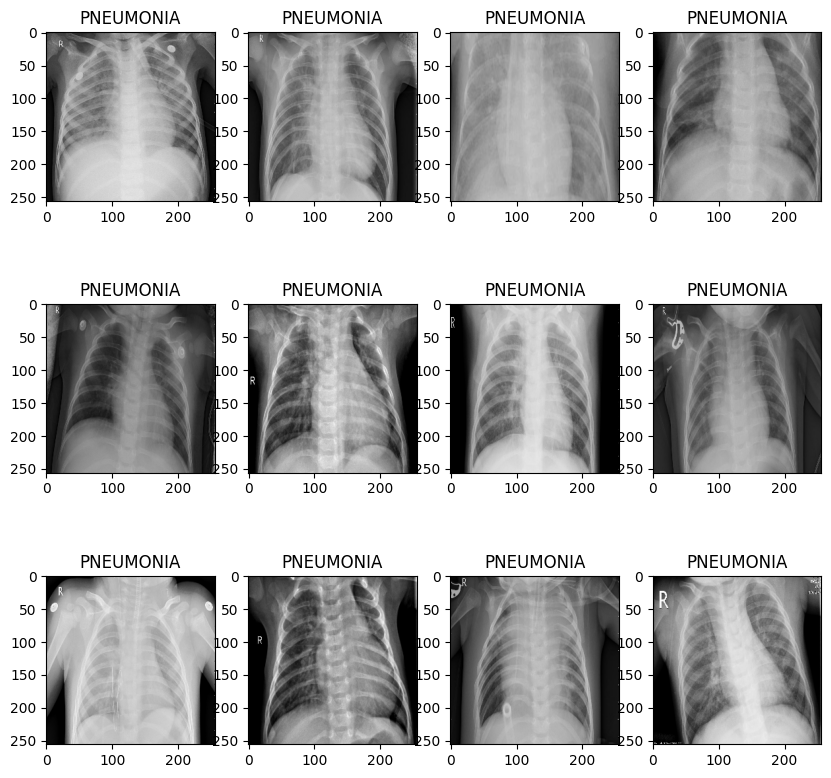

In [3]:
plt.figure(figsize=(10,10))
for image,label in train_dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])

In [4]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
                                        layers.experimental.preprocessing.Rescaling(1.0/255)])
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                       layers.experimental.preprocessing.RandomRotation(0.2)])

In [6]:
#Building CNN Model

input_shape=(Batch_Size,Image_Size,Image_Size,3)
model=keras.Sequential()
model.add(resize_and_rescale)
model.add(data_augmentation)
model.add(keras.layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=input_shape))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

model.build(input_shape=input_shape)
#model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history=model.fit(train_dataset,epochs=20,batch_size=Batch_Size,verbose=1,validation_data=val_dataset)

Epoch 1/20
163/163 [==============================] - 703s 4s/step - loss: 0.5800 - accuracy: 0.7404 - val_loss: 0.6252 - val_accuracy: 0.6875
Epoch 2/20
163/163 [==============================] - 684s 4s/step - loss: 0.4595 - accuracy: 0.7738 - val_loss: 0.6124 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 675s 4s/step - loss: 0.3958 - accuracy: 0.8238 - val_loss: 0.4737 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 678s 4s/step - loss: 0.3351 - accuracy: 0.8574 - val_loss: 1.0274 - val_accuracy: 0.5625
Epoch 5/20
163/163 [==============================] - 674s 4s/step - loss: 0.2815 - accuracy: 0.8842 - val_loss: 0.3134 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 676s 4s/step - loss: 0.2193 - accuracy: 0.9093 - val_loss: 0.6850 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 678s 4s/step - loss: 0.2181 - accuracy: 0.9128 - val_loss: 0.3022 - val_accuracy: 0.8125

In [7]:
model.save('my_model.keras')

In [9]:
scores=model.evaluate(test_dataset,verbose=2)

20/20 - 27s - loss: 0.2945 - accuracy: 0.8942 - 27s/epoch - 1s/step


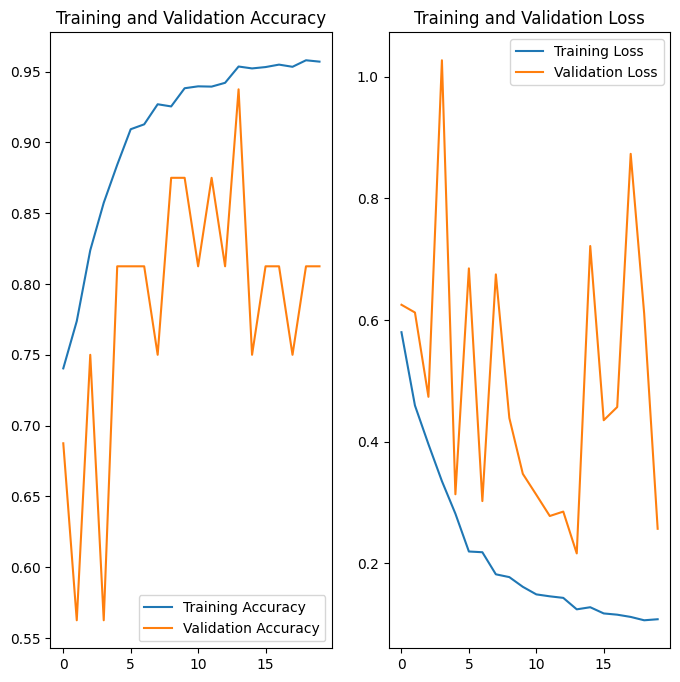

In [16]:
#Plotting Training and Validation Accuracy and Loss

def accuracy_and_loss(accuracy,val_accuracy,loss,val_loss):
  acc=accuracy
  val_acc=val_accuracy
  loss_=loss
  val_loss_=val_loss
  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(range(20),acc,label="Training Accuracy")
  plt.plot(range(20),val_acc,label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")
  plt.subplot(1,2,2)
  plt.plot(range(20),loss_,label="Training Loss")
  plt.plot(range(20),val_loss_,label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

accuracy_and_loss(history.history["accuracy"],history.history["val_accuracy"],history.history["loss"],history.history["val_loss"])

1/1 [==============================] - 0s 49ms/step


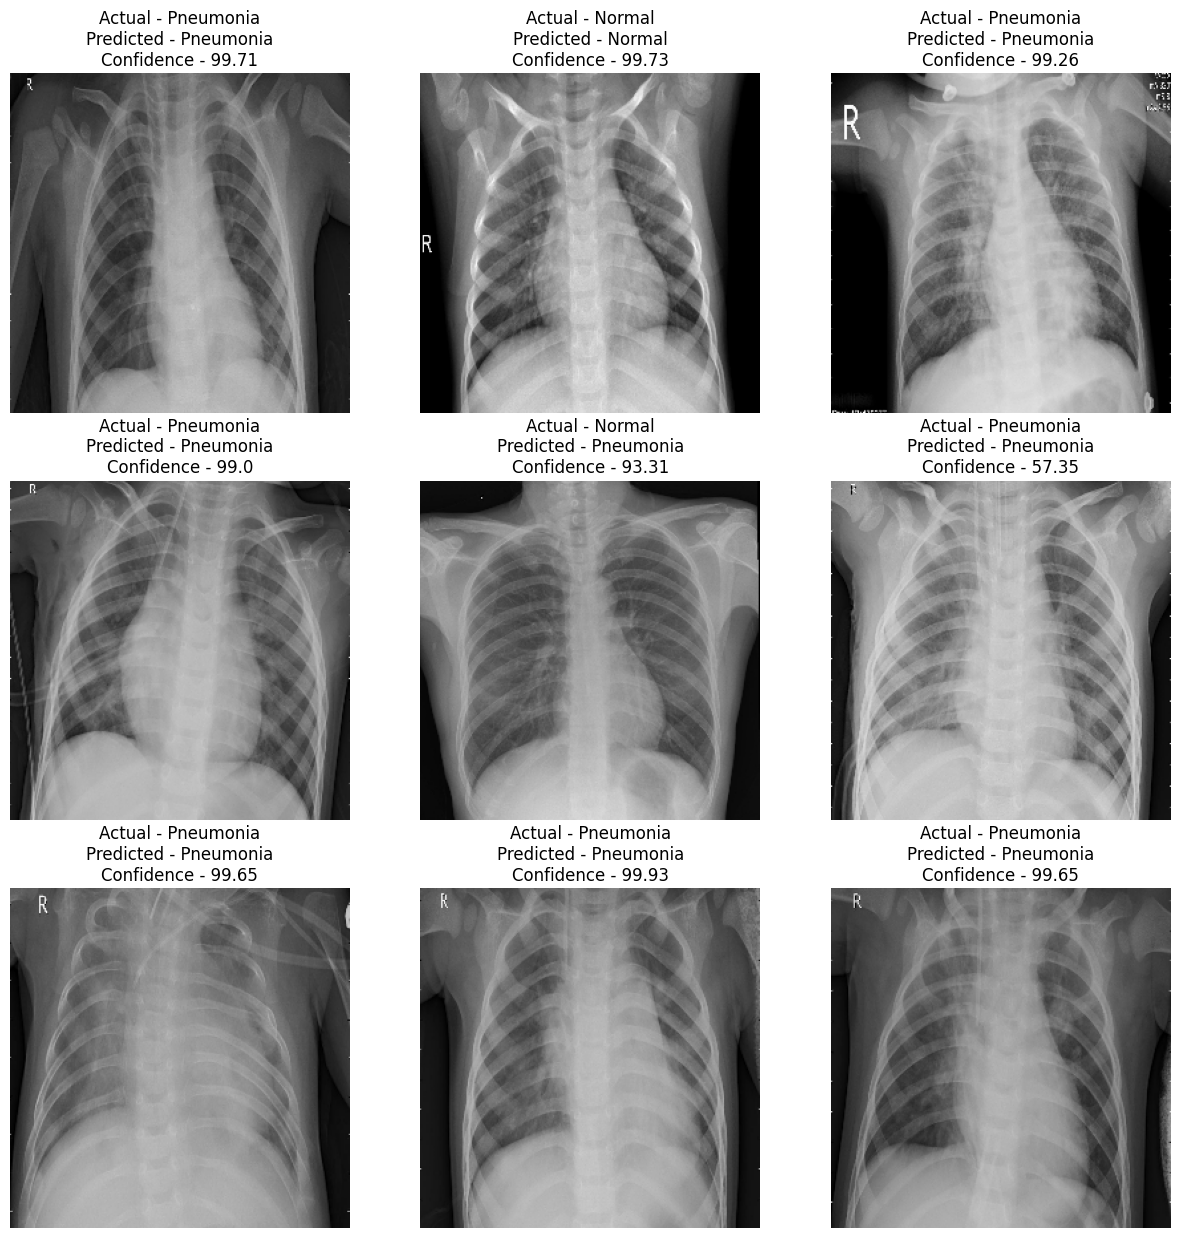

In [33]:
# for images_batch,labels_batch in test_dataset.take(1):
#   image=images_batch[0].numpy().astype("uint8")
#   label=labels_batch[0].numpy()
#   plt.imshow(image)
#   print("Actual Label - ",class_names[label])
#   batch_prediction=model.predict(images_batch)
#   print(class_names[np.argmax(batch_prediction[0])])

def predict_model(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])].lower().capitalize()
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

plt.figure(figsize=(15,15))
for images_batch,labels_batch in test_dataset.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images_batch[i].numpy().astype("uint8"))
    predicted_class,confidence=predict_model(model,images_batch[i])
    actual_class=class_names[labels_batch[i]].lower().capitalize()
    plt.title(f"Actual - {actual_class}\nPredicted - {predicted_class}\nConfidence - {confidence}")
    plt.axis("off")

In [ ]:
#Confusion Matrix

def get_true_and_predicted_labels(model, dataset):
    true_labels = []
    predicted_labels = []

    for images_batch, labels_batch in dataset:
        for i in range(len(images_batch)):
            true_labels.append(labels_batch[i].numpy())
            img_array = tf.keras.preprocessing.image.img_to_array(images_batch[i].numpy())
            img_array = tf.expand_dims(img_array, 0)
            predictions = model.predict(img_array)
            predicted_labels.append(np.argmax(predictions[0]))

    return true_labels, predicted_labels

true_labels, predicted_labels = get_true_and_predicted_labels(model, test_dataset)
conf_mat = confusion_matrix(true_labels, predicted_labels)

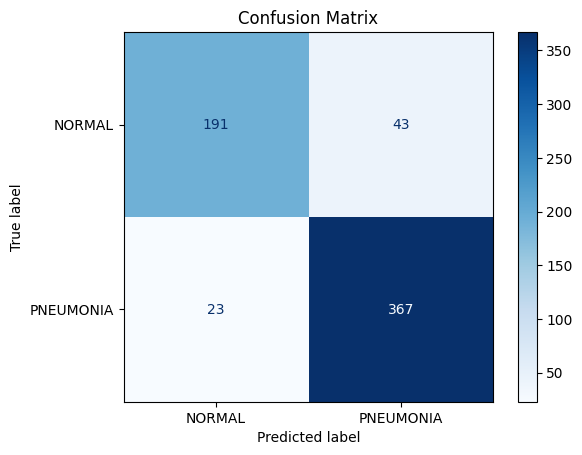

In [39]:
disp = ConfusionMatrixDisplay(conf_mat, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()